In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np # generic math functions
import matplotlib.pyplot as plt # plotting library

C:\Anaconda3\envs\quspin\lib\site-packages\ipykernel_launcher.py:62: MatplotlibDeprecationWarning: For X (21) and Y (10) with flat shading, the expected shape of A is (9, 20). Passing A ((1, 180)) is deprecated since 3.5 and will become an error two minor releases later.


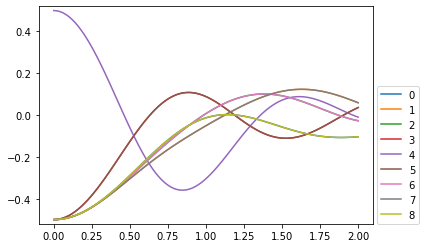

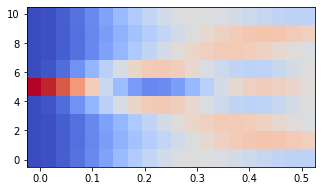

In [3]:
L=18# system size
basis = spin_basis_1d(L,pauli=False,m=0) 
#i0 = basis.index("0110010101") # pick state from basis set


i0 = basis.index("010101011001010101") # pick state from basis set
psi01 = np.zeros(basis.Ns,dtype=np.float64)
psi01[i0] = 1.0 # define state corresponding to the string "111000"
psi0=(psi01)

Jr=1# spin ring

##### construct basis in the 0-total momentum and +1-parity sector
# define PBC site-coupling lists for operators

H0=[[-Jr,i,(i+2)%L]  for i in range(L-2)] 
H1=[[-Jr,2*i,(2*i+1)]  for i in range(L//2)] 





no_checks = dict(check_herm=False,check_symm=False,check_pcon=False)
# static and dynamic lists
static0=[["+-",H0],["-+",H0],["+-",H1],["-+",H1]]

dynamic=[]
###### construct Hamiltonian
Hd0=hamiltonian(static0,dynamic,basis=basis,**no_checks)
#
ttol=2
step=100
tlist1=np.linspace(0,ttol,step)

psi_list=Hd0.evolve(psi0,0,tlist1)

n_list = [hamiltonian([["z",[[1.0,i]]]],[],basis=basis,dtype=np.float64,**no_checks) for i in range(L)]
expt_n_t_sta1 = np.vstack([n.expt_value(psi_list).real for n in n_list]).T

for i in range(L//2):
    plt.plot(tlist1,expt_n_t_sta1[:,2*i],label=i)
plt.legend(loc=[1.01,0])
plt.ylim([-0.52,0.52])
aa=np.zeros(step)
bb=np.zeros(step)
for i in range(9):
    aa+=expt_n_t_sta1[:,2*i]*i
    bb+=expt_n_t_sta1[:,2*i+1]*i
# plt.plot(aa)
# plt.plot(bb)
aaa=[]

for i in range(L):
    aaa.append(expt_n_t_sta1[:,i])
fig = plt.figure(figsize=[8,6],
                 facecolor='w')
aam=np.mat(aaa)
#ax2 = fig.add_axes([0.63,0.700,0.32,0.265])
ax1 = fig.add_axes([0.150,0.100,0.5,0.37])

xm, ym = np.meshgrid(np.linspace(-0.5,10.5,21)/20,np.linspace(-0.5,10.5,10))
hd1=ax1.pcolormesh(xm,ym,aam[::2,::5],cmap='coolwarm',shading='flat')


In [4]:
aaa=[]
for i in range(L):
    aaa.append(expt_n_t_sta1[:,i])
import pandas as pd


df = pd.DataFrame(aaa)

df.to_csv('xxex.csv', index=False)